# Train a fastai model to recognize clothing items such as shirts, pants, socks, and dresses

## Install dependencies

In [1]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

## Create categories and a data folder

In [4]:
clothe_types = 'shirt', 'pants', 'dress', 'socks'
path = Path('clothes')

In [5]:
if not path.exists():
    path.mkdir()
    for o in clothe_types:
            dest = (path/o)
            dest.mkdir(exist_ok = True)
            results = search_images_ddg(f'{o}')
            download_images(dest, urls=results)

In [6]:
fns = get_image_files(path)
fns

(#591) [Path('clothes/dress/b5ac9ea6-87fb-4173-82d4-326138004cce.jpg'),Path('clothes/dress/0435519e-a442-422a-8401-c46d3fd106c3.jpg'),Path('clothes/dress/cd477bd9-aa97-40ba-9189-0cf46d211814.jpg'),Path('clothes/dress/690eaed8-ded2-4e0c-b3c1-ef9b72ad4027.jpg'),Path('clothes/dress/d866ee79-19d7-4932-940f-25e24049e6ea.jpg'),Path('clothes/dress/87de9d66-73e3-402e-92e1-a0129d1d6203.jpg'),Path('clothes/dress/6eaeeb1d-143f-4594-ad30-356359195955.jpg'),Path('clothes/dress/bcc646fb-258f-4f39-828c-77007d3d776a.jpg'),Path('clothes/dress/31dbf446-e338-4dab-bff6-06aaec0758b2.jpg'),Path('clothes/dress/6a77e28e-ff9b-4952-9421-fdfb180a6da2.jpg')...]

## Unlink files with broken urls

In [7]:
failed = verify_images(fns)
failed

(#29) [Path('clothes/shirt/e81797ad-9dcc-44d5-81f7-1913b7d5d298.jpg'),Path('clothes/shirt/423f8260-5a47-4429-81ac-47e1bc867a38.jpg'),Path('clothes/shirt/bd49a72c-4202-4b5c-9592-7e9f37164d69.jpg'),Path('clothes/shirt/7aea9759-c319-43bb-9208-9894f0715584.jpg'),Path('clothes/shirt/c10951ed-2743-45ce-b381-50e036c090d3.jpg'),Path('clothes/pants/e0c24d0d-45d9-402d-a309-f04c56dab26b.jpg'),Path('clothes/pants/c88597d5-cba7-4e5a-8d94-3f5bec7b741f.jpg'),Path('clothes/pants/df3cd9c6-3079-4eab-a413-31ef341eef3c.jpg'),Path('clothes/pants/a2c001c4-9ccb-4013-9f94-9ecb8f80ba59.jpg'),Path('clothes/pants/7505ecb2-5f60-495d-a190-569c89c56b70.jpg')...]

In [8]:
failed.map(Path.unlink)

(#29) [None,None,None,None,None,None,None,None,None,None...]

## Create a datablock to import and split the data into train and test sets

In [9]:
clothe = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 0),
    get_y = parent_label,
    item_tfms = Resize(128))

## Transform and augment the data

In [10]:
clothe = clothe.new(
    item_tfms = RandomResizedCrop(224, min_scale = 0.5),
    batch_tfms = aug_transforms())
dls = clothe.dataloaders(path)

## Apply a fastai vision model to the data
See [article](https://www.kaggle.com/code/jhoward/which-image-models-are-best)
by Jeremy Howard about which model is best for image classification

List of Pytorch image models

In [11]:
%%capture
!pip install timm

In [12]:
import timm
timm.list_models('convnext*')

['convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_nano_hnf',
 'convnext_nano_ols',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']

Select a model to use for training

In [13]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.736452,0.402375,0.125000,00:25


/root/mambaforge/lib/python3.9/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.562999,0.346020,0.098214,00:26
1,0.438043,0.349277,0.080357,00:26
2,0.311372,0.299984,0.071429,00:26
3,0.261189,0.276312,0.071429,00:26


/root/mambaforge/lib/python3.9/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/root/mambaforge/lib/python3.9/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/root/mambaforge/lib/python3.9/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/root/mambaforge/lib/python3.9/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


## Investigate the performance of the model

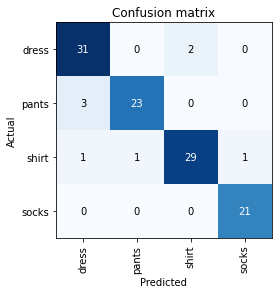

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### Data points with the highest losses
Either wrong results with high confidence or correct results with low confidence

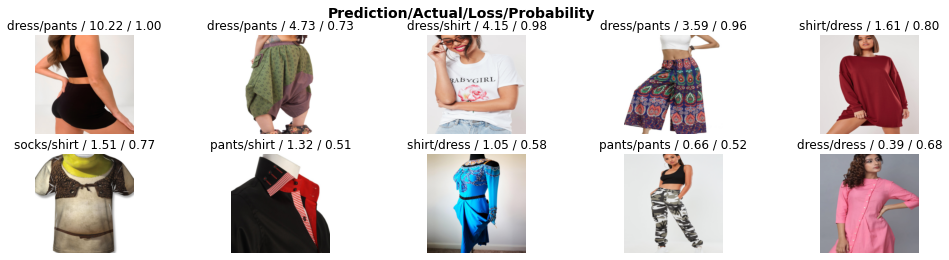

In [15]:
interp.plot_top_losses(10, nrows = 2, figsize = (17,4))

## Clean the data

/root/mambaforge/lib/python3.9/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


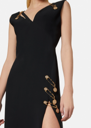

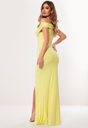

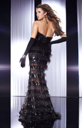

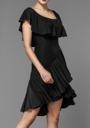

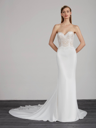

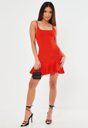

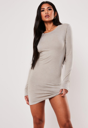

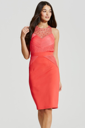

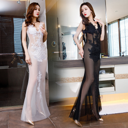

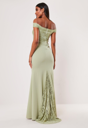

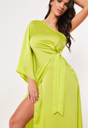

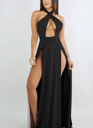

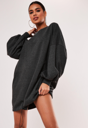

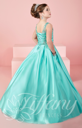

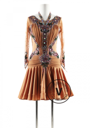

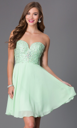

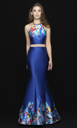

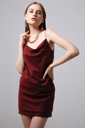

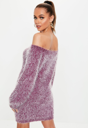

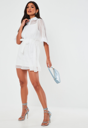

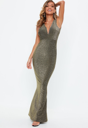

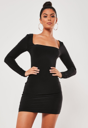

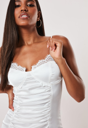

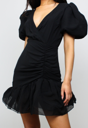

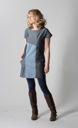

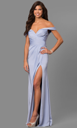

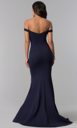

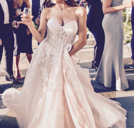

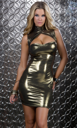

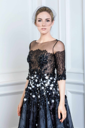

In [16]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [17]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Upload the model to HuggingFace hub
### Install git-lfs, a dependency for uploading to the hub

In [18]:
!sudo apt-get install git-lfs
!git lfs install

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 66 not upgraded.
Need to get 2129 kB of archives.
After this operation, 7662 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 git-lfs amd64 2.3.4-1 [2129 kB]
Fetched 2129 kB in 1s (3165 kB/s)  
Selecting previously unselected package git-lfs.
(Reading database ... 54953 files and directories currently installed.)
Preparing to unpack .../git-lfs_2.3.4-1_amd64.deb ...
Unpacking git-lfs (2.3.4-1) ...
Setting up git-lfs (2.3.4-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Updated git hooks.
Git LFS initialized.


### Login into the hub with 'write' token access

In [28]:
from huggingface_hub import notebook_login
notebook_login()

In [29]:
from huggingface_hub import push_to_hub_fastai

repo_id = "tompham97/clothe-classifier"

push_to_hub_fastai(learner = learn, repo_id = repo_id)

ValueError: You must login to the Hugging Face Hub. There are two options: (1) Type `huggingface-cli login` in your terminal and enter your token. (2) Enter your token in the `token` argument. Your token is available in the Settings of your Hugging Face account. 